In [1]:
print("Hello World")

Hello World


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# You shouldn't use the `seed` function in real science code, but we use it here for example purposes.
# It makes the "random" number generator always give the same numbers wherever you run it.
np.random.seed(12345)

# Set up matplotlib
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from astropy.visualization import quantity_support

In [4]:
import astropy.units as u

In [5]:
from astropy.constants import G, h, k_B, hbar

In [23]:
Reff = 29 * u.pc

In [25]:
Reff = u.Quantity(29, unit=u.pc)

In [31]:
print(
    """Half light radius
value: {0}
unit: {1}""".format(Reff.value, Reff.unit)
)

Half light radius
value: 29.0
unit: pc


In [32]:
Reff.to(u.m)

<Quantity 8.94846499e+17 m>

In [44]:
vmean = 206
sigin = 4.3
v = np.random.normal(vmean, sigin, 500) * u.km / u.s

In [49]:
print("First ten radial velocities {0} {1}".format(v[:10], v.to(u.m / u.s)[:10]))

First ten radial velocities [202.72409998 204.57404734 198.46934365 208.70424468 207.21475802
 200.24600045 203.84739055 206.52307363 213.34579094 201.82470237] km / s [202724.09998258 204574.04733776 198469.34365134 208704.24467632
 207214.75801576 200246.00045101 203847.39054659 206523.07362854
 213345.79093736 201824.70237222] m / s


In [52]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x1a66c563230>

Text(0, 0.5, 'N')

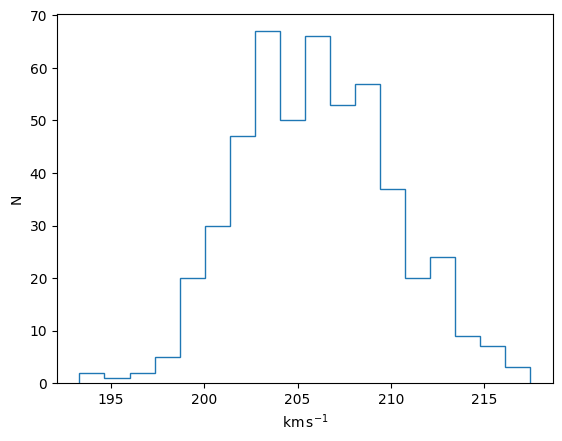

In [67]:
plt.figure()
plt.hist(v, bins='auto', histtype='step')
plt.ylabel("N")

In [79]:
sigma = np.sqrt(np.sum((v - np.mean(v))**2) / np.size(v))

print("Velocity Dispersion: {0: .2f}".format(sigma))

Velocity Dispersion:  4.05 km / s


In [81]:
M = 4 * sigma**2 * Reff / G

In [82]:
M

<Quantity 2.85713477e+13 km2 kg pc / m3>

In [85]:
M.decompose()

<Quantity 8.81619671e+35 kg>

In [86]:
print("Galaxy Mass in solar units:{0: .3g} SI units:{1:.3g} CGS units:{2: .3g}".format(M.to(u.Msun), M.si, M.cgs))

Galaxy Mass in solar units: 4.43e+05 solMass SI units:8.82e+35 kg CGS units: 8.82e+38 g


In [87]:
np.log10(M.to_value(u.Msun))

np.float64(5.64677536136972)

In [88]:
from astropy import constants as const

In [89]:
r = const.au

In [91]:
GM_sun = const.G * const.M_sun
v_kepler = (GM_sun / r )**0.5
v_kepler = v_kepler.to(u.km/u.s)

print(f"Orbital speed from kepler's law:{v_kepler : .3f}")

Orbital speed from kepler's law: 29.785 km / s


In [92]:
T = 1 * u.year
circumference = 2 * np.pi * r 
v_simple = (circumference / T).to(u.km / u.s)
print(f"Orbital speed from circumference / period : {v_simple : .3f}")

percent_diff = ((v_kepler - v_simple) / v_simple * 100).decompose()

print(f"Percentage difference: {percent_diff: .3e}")

Orbital speed from circumference / period :  29.785 km / s
Percentage difference: -1.889e-03


# Molecular Gas Cloud

In [6]:
d = 250 * u.pc
T = 25 * u.K

In [7]:
# Cloud centre

cen_ra = 52.25 * u.deg 
cen_dec = 0.25 * u.deg
cen_v = 15 * u.km/u.s

In [11]:
#cloud size

sig_ra = 3 * u.arcmin 
sig_dec = 4 * u.arcmin 
sig_v = 3 * u.km/u.s 

In [13]:
# 1D Coordinate quantities

ra = np.linspace(52, 52.5, 100) * u.deg 
dec = np.linspace(0, 0.5, 100) * u.deg 
v = np.linspace(0,30,100) * u.km/u.s 

ra_cube, dec_cube, v_cube = np.meshgrid(ra, dec, v)

data_gauss = np.exp(
    
    -0.5 * ((ra_cube - cen_ra)/sig_ra)**2
    + -0.5 * ((dec_cube - cen_dec)/sig_dec)**2
    + -0.5 * ((v_cube - cen_v)/sig_v)**2 
    
)

In [18]:
data = data_gauss * u.K

In [21]:
dra = (ra.max() - ra.min()) / len(ra)
ddec = (dec.max() - dec.min()) / len(dec)

dv = (v.max() - v.min()) /len(v)

print("dra = {0} ddec = {1} dv = {2} ".format(dra.to(u.arcsec), ddec.to(u.arcsec), dv)
      
      )

dra = 18.0 arcsec ddec = 18.0 arcsec dv = 0.3 km / s 


In [22]:
intcloud = np.sum(data * dv, axis = 2)
intcloud.unit

Unit("K km / s")

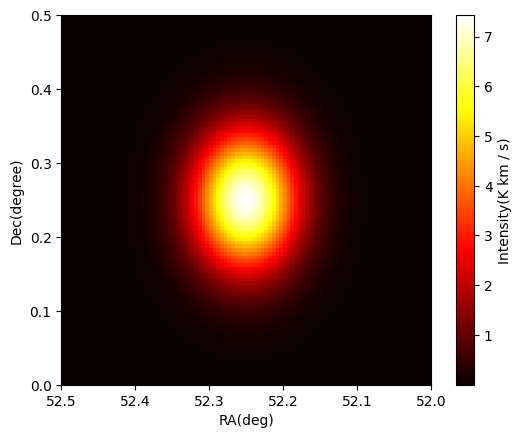

In [27]:
plt.imshow(
    
    intcloud.value, origin = 'lower',
    extent=[ra.value.max(), ra.value.min(), dec.value.min(), dec.value.max()],
    cmap="hot",
    interpolation='nearest',
    aspect='equal' 
       
        
)

plt.colorbar().set_label("Intensity({})".format(intcloud.unit))
plt.xlabel("RA(deg)")
plt.ylabel("Dec(degree)");

In [30]:
lambda13 = 2.60076 * u.mm
lambda18 = 2.73079 * u.mm 


In [32]:
nu13 = lambda13.to(u.Hz, equivalencies=u.spectral())
nu18 = lambda18.to(u.Hz, equivalencies=u.spectral())

In [33]:
nu13 = 115271096910.13396 * u.Hz
nu18 = 109782318669.689 * u.Hz
A13 = 7.4e-8 / u.s
A18 = 8.8e-8 / u.s

C = 3e14 * (nu18 / nu13) ** 3 * (A13 / A18) / (u.K * u.cm**2 * u.km * (1 / u.s))
C

<Quantity 2.17924582e+14 s / (K km cm2)>

In [35]:
B = h * nu18 / (k_B * T)

In [36]:
print("{0}\n{1}".format(B, B.decompose()))

0.21074881298143522 Hz s
0.21074881298143522


In [37]:
NCO = C * np.sum(data * dv, axis=2) / (1 - np.exp(-B))
print("Peak CO column density: ")
np.max(NCO)

Peak CO column density: 


<Quantity 8.52083054e+15 1 / cm2>

In [38]:
H2_CO_ratio = 5.9e6
NH2 = NCO * H2_CO_ratio
print("Peak H2 column density: ")
np.max(NH2)

Peak H2 column density: 


<Quantity 5.02729002e+22 1 / cm2>